# Data Analysis

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Reading the dataset

In [2]:
import os
os.chdir('C:/Datasets/')

In [3]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

## Visulisation libraries

###  1.matplotlib : import matplotlib.pyplot as plt
 ### 2.seaborn : import seaborn as sns

## Study the relationship between RND and PROFIT

In [5]:
import matplotlib.pyplot as plt

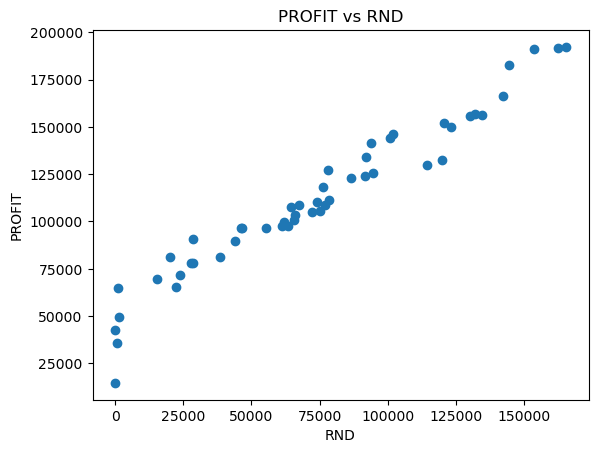

In [6]:
plt.scatter(df['RND'],df['PROFIT'])
plt.xlabel('RND')
plt.ylabel('PROFIT')
plt.title('PROFIT vs RND')
plt.show()

### Step 1: Dataframe basic info

In [7]:
df.shape

(50, 5)

In [8]:
df.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

## Seperate Categorical Features and Continuous features

In [11]:
df.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [12]:
df.dtypes

RND       float64
ADMIN     float64
MKT       float64
STATE      object
PROFIT    float64
dtype: object

In [13]:
cat = list(df.columns[df.dtypes=='object'])
cat

['STATE']

In [14]:
con = list(df.columns[df.dtypes!='object'])
con

['RND', 'ADMIN', 'MKT', 'PROFIT']

In [15]:
df[con].describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [16]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
RND,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
ADMIN,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
MKT,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
PROFIT,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [17]:
df[cat].describe().T

,count,unique,top,freq
STATE,50,3,New York,17


In [18]:
df['STATE'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [19]:
df['STATE'].value_counts()

New York      17
California    17
Florida       16
Name: STATE, dtype: int64

## Univariate Analysis

In [30]:
#1. cat - countplot

In [22]:
df['STATE'].value_counts()

New York      17
California    17
Florida       16
Name: STATE, dtype: int64

<Axes: >

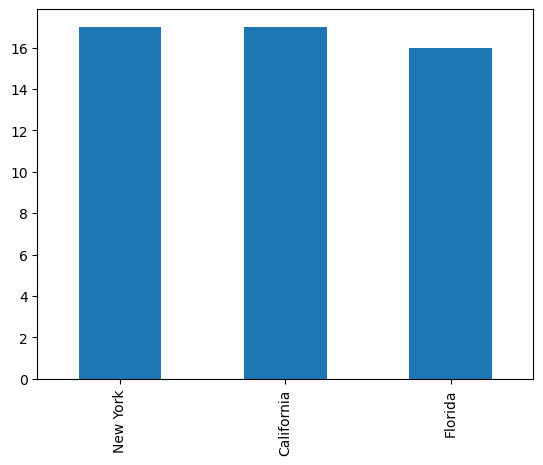

In [23]:
df['STATE'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Counts For STATE'}, xlabel='STATE', ylabel='count'>

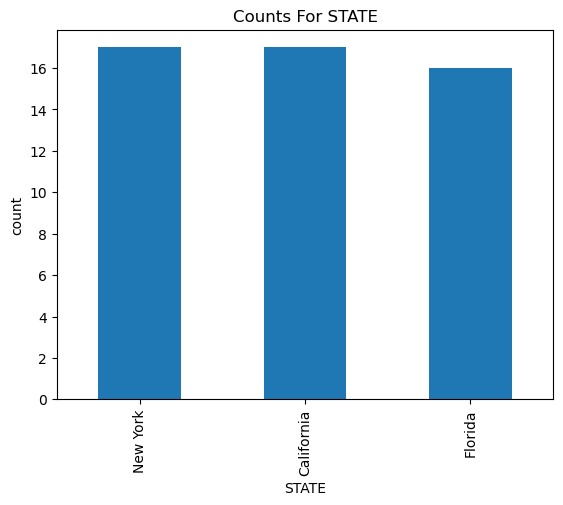

In [27]:
df['STATE'].value_counts().plot(kind='bar',
                                xlabel='STATE',
                               ylabel='count',
                               title='Counts For STATE')

<Axes: >

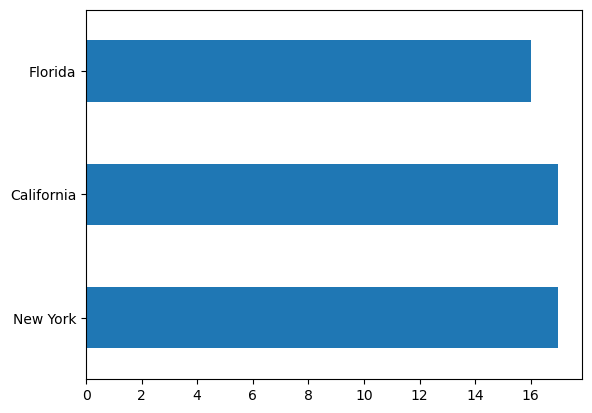

In [28]:
df['STATE'].value_counts().plot(kind='barh')

<Axes: ylabel='STATE'>

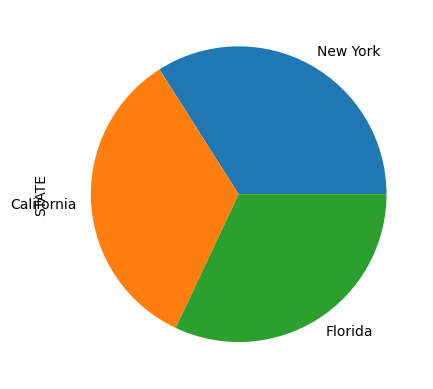

In [29]:
df['STATE'].value_counts().plot(kind='pie')

## Histogram for Continuous features

In [32]:
con

['RND', 'ADMIN', 'MKT', 'PROFIT']

<Axes: xlabel='RND', ylabel='Count'>

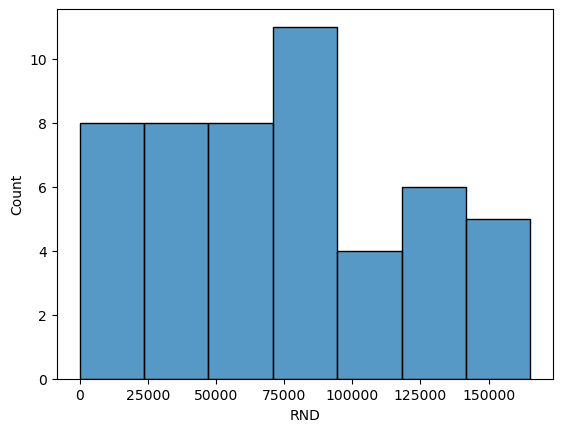

In [35]:
import seaborn as sns
sns.histplot(data=df,x='RND')

<Axes: xlabel='RND', ylabel='Count'>

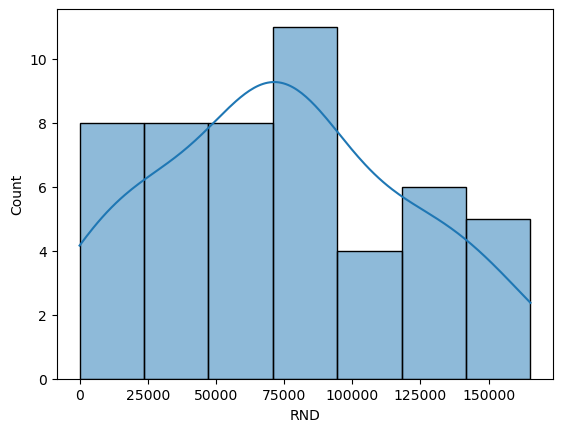

In [34]:
import seaborn as sns
sns.histplot(data=df,x='RND',kde=True)

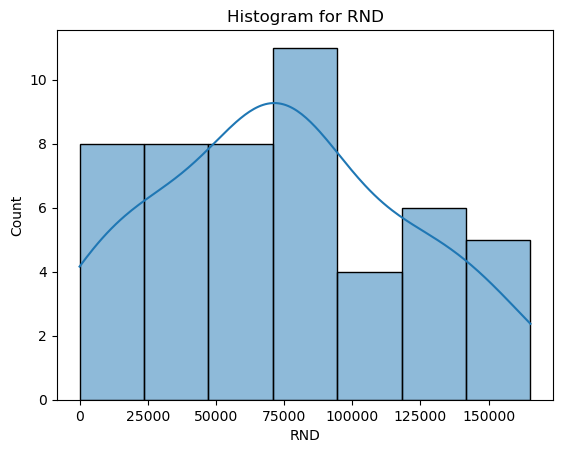

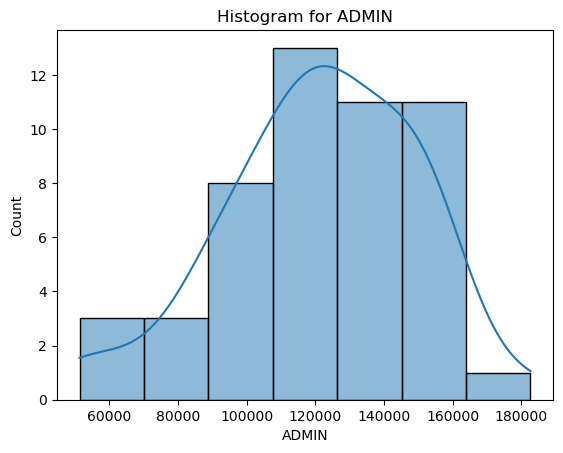

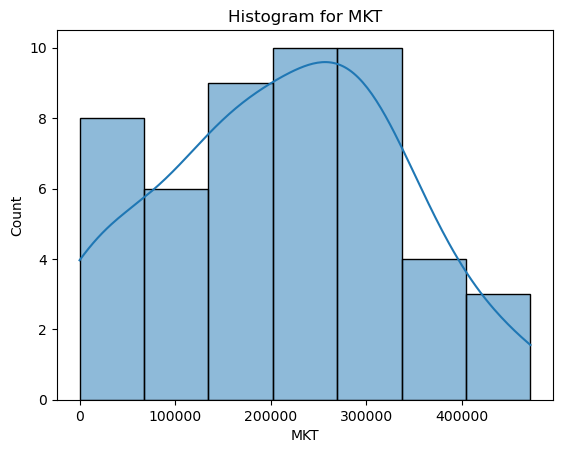

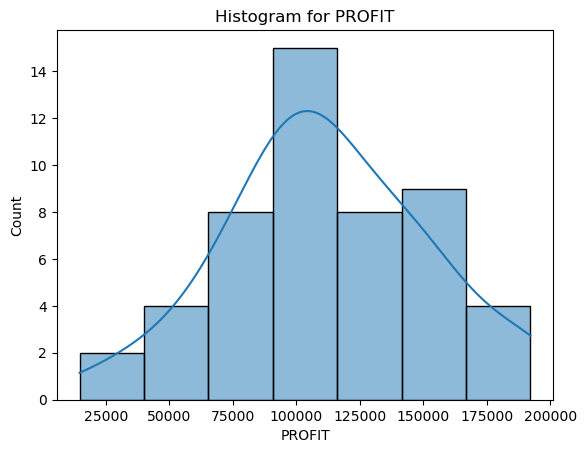

In [37]:
for i in con:
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

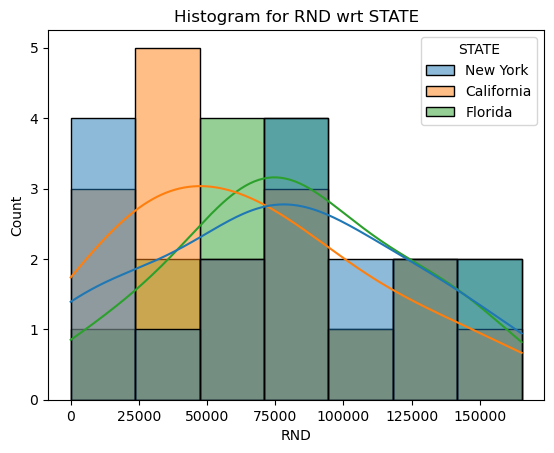

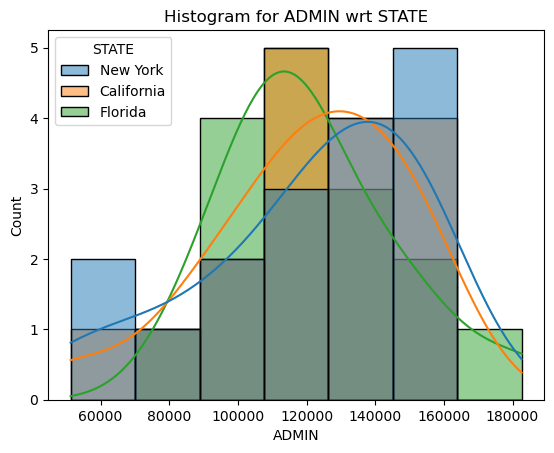

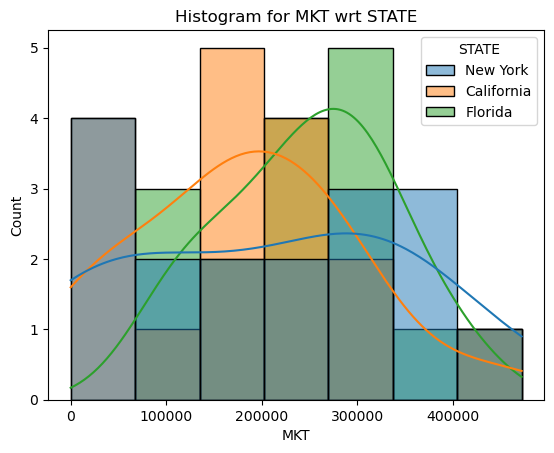

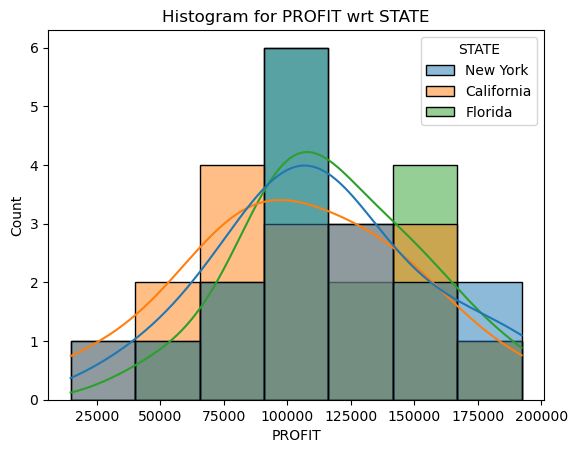

In [38]:
for i in con:
    sns.histplot(data=df,x=i,kde=True,hue='STATE')
    plt.title(f'Histogram for {i} wrt STATE')
    plt.show()

## Subplot

Text(0.5, 1.0, 'Histogram For PROFIT')

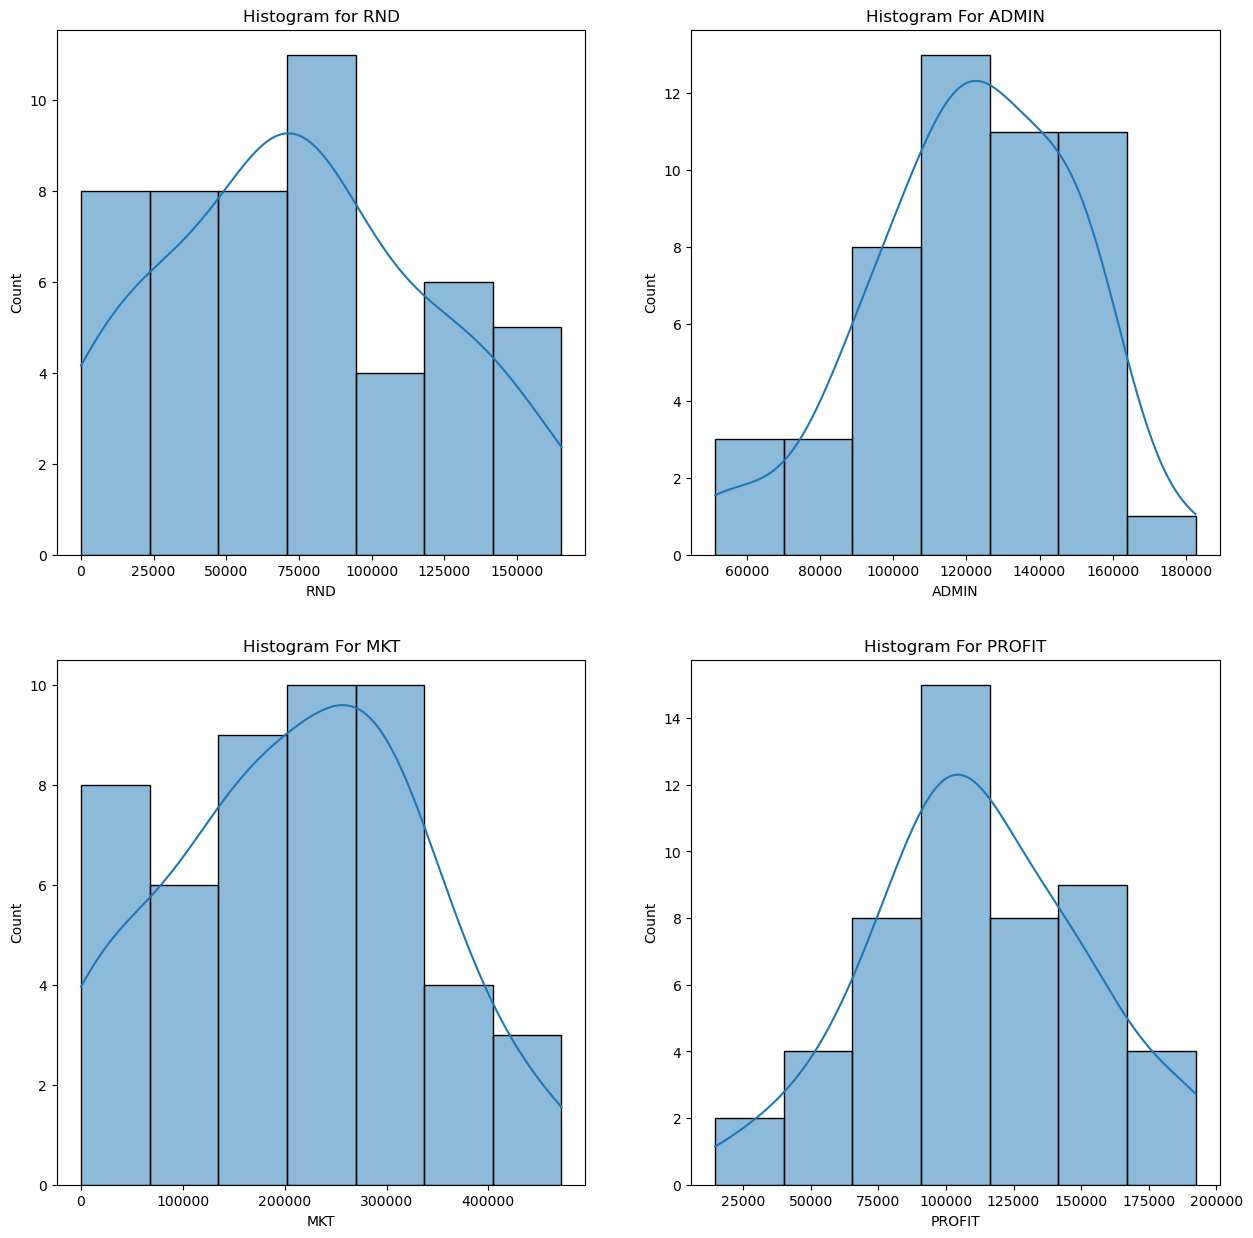

In [41]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.histplot(data=df,x='RND',kde=True)
plt.title('Histogram for RND')

plt.subplot(2,2,2)
sns.histplot(data=df,x='ADMIN',kde=True)
plt.title('Histogram For ADMIN')

plt.subplot(2,2,3)
sns.histplot(data=df,x='MKT',kde=True)
plt.title('Histogram For MKT')

plt.subplot(2,2,4)
sns.histplot(data=df,x='PROFIT',kde=True)
plt.title('Histogram For PROFIT')

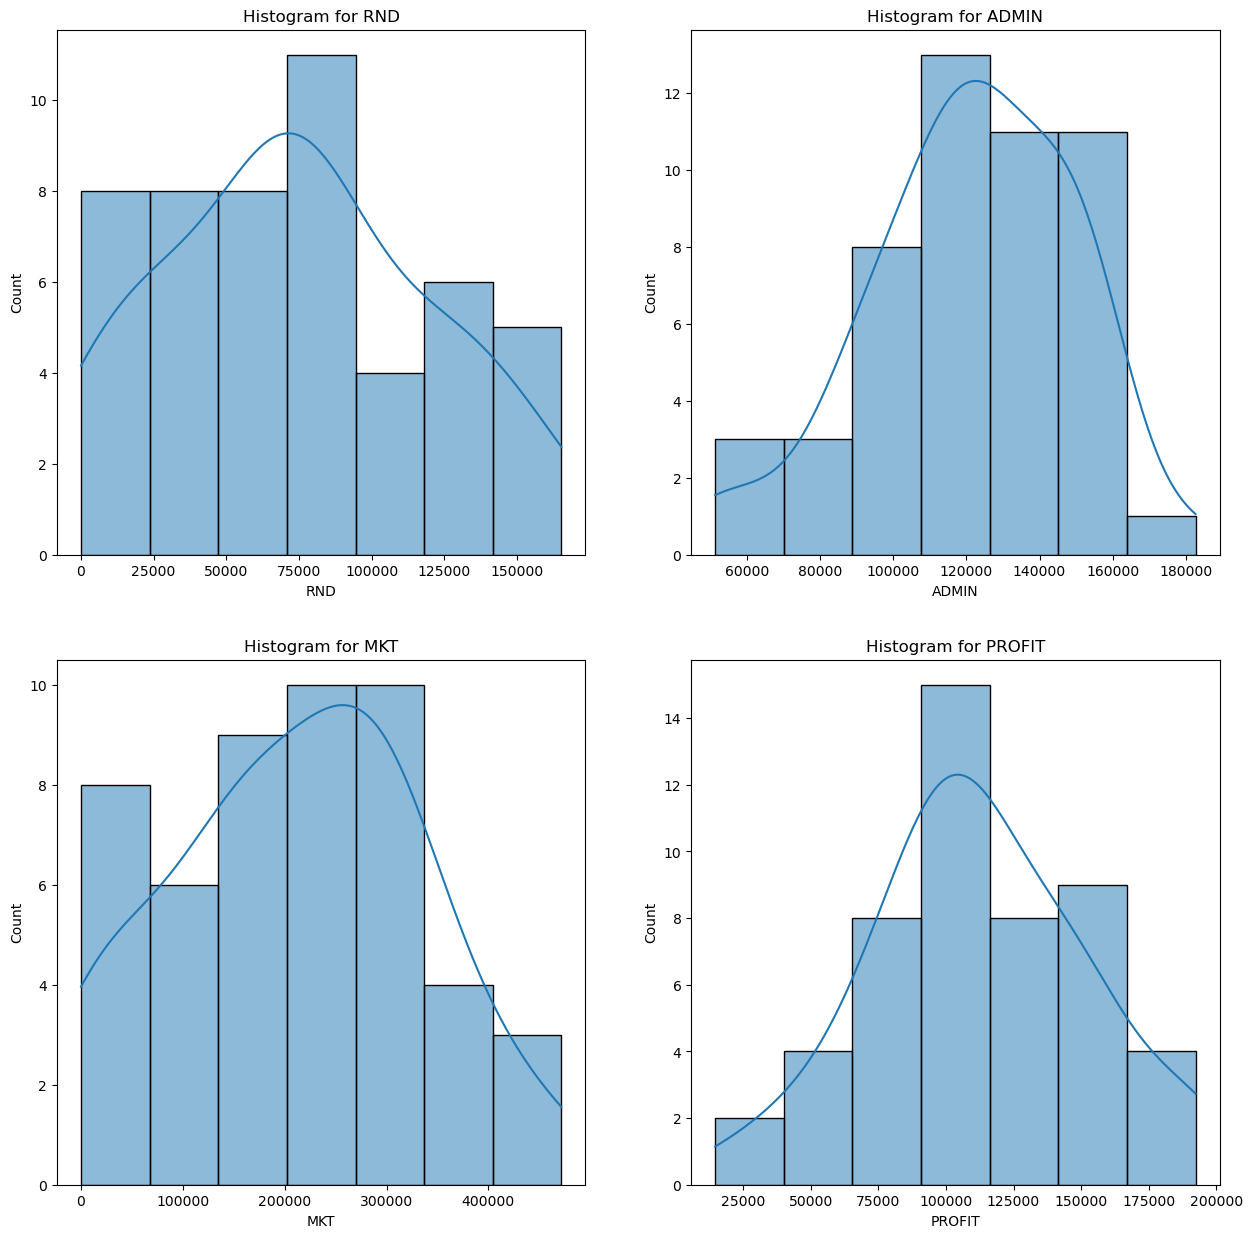

In [57]:
# Using for loop

plt.figure(figsize=(15,15))

x=1
    
for i in con:
    plt.subplot(2,2,x)
    
    x = x+1
    
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'Histogram for {i}')
plt.show()
    
    
           
           